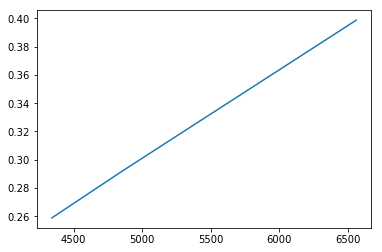

159088.479008
Hydrogen: 159088.47900794662


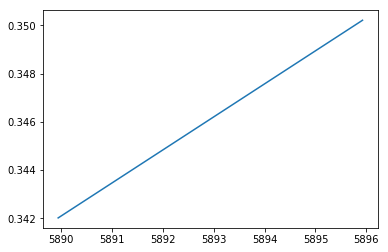

7296.72210372
Sodium: 7296.722103724687


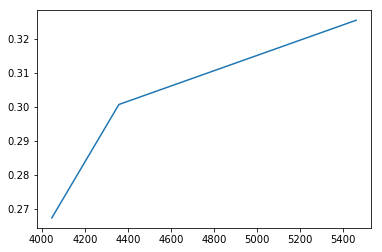

275273.045249
Mercury: 275273.0452490161


In [118]:
import numpy as np
import matplotlib.pyplot as plt

def main():
    
    f = open("data.txt", "r")
    fnew = open("GratingSpacing.txt", "w")
    fnew.write("The following are the values for the  diffraction grating spacing obtained after testing with each respective gas, given in meters")
    fnew.write(" ")

    for i in range(0, 3):
        str = f.readline()
            dataList = str.split()
        lamdas = []
        thetas = []
        sin_thetas = []
        for j in range(0, len(dataList)):
            if j % 2 == 0:
                lamda = float(dataList[j])
                lamdas.append(lamda)
            else:
                theta = float(dataList[j])
                thetas.append(theta)
        for c in range(len(thetas)):
            sin_thetas.append(np.sin(thetas[c]* np.pi/180.0))
        y_data = np.array(sin_thetas)
        x_data = np.array(lamdas)

        plt.plot(x_data, y_data)

        plt.show()

        arr = np.polyfit(x_data, y_data, 1)
        d = (1/arr[0]) * (10**1)
        
        print (d)

        if i == 0:
            strLine = "Hydrogen: {}".format(d)
        if i == 1:
            strLine = "Sodium: {}".format(d)
        if i == 2:
            strLine = "Mercury: {}".format(d)
        
        fnew.write(strLine)
        
        print (strLine)
        
    f.close()
    fnew.close()

main()
        